In [2]:
from sklearn import datasets

In [9]:
california = datasets.fetch_california_housing()
x = california.data
y = california.target

In [65]:
import pandas as pd
df = pd.DataFrame(x)
df.columns = california.feature_names
for feature_name in california.feature_names:
    df[f"{feature_name}_squared"] = df[feature_name] ** 2

for i in range(1, len(california.feature_names)):
    feature_name = california.feature_names[i]
    prev_feature_name = california.feature_names[i - 1]
    df[f"{feature_name}_{prev_feature_name}"] = df[feature_name] * df[prev_feature_name]

# df["House_Age_Age"] = df.HouseAge ** 2
x2 = df.values
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_squared,HouseAge_squared,...,AveOccup_squared,Latitude_squared,Longitude_squared,HouseAge_MedInc,AveRooms_HouseAge,AveBedrms_AveRooms,Population_AveBedrms,AveOccup_Population,Latitude_AveOccup,Longitude_Latitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,...,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,18.591242,978.608769,...,1.172937e+02,1274.191621,14300.928169,108.008027,150.711113,6.947669,1527.759418,5.198820e+03,109.465648,-4264.448003
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,21.946544,750.695219,...,1.119238e+04,154.386369,480.328440,74.386418,87.998790,43.385002,1222.752354,7.177078e+04,397.925691,323.904337
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.249900,1.000000,...,4.792899e-01,1058.851600,13066.776100,1.625000,3.000000,0.444444,4.000000,2.250000e+00,25.530000,-5207.673000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,6.571020,324.000000,...,5.903642e+00,1151.244900,13926.360100,57.997425,96.523176,4.627710,834.431518,2.054519e+03,87.055536,-4601.026500
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,12.494811,841.000000,...,7.941776e+00,1173.747600,14039.880100,92.502950,144.485499,5.469516,1242.908080,3.277450e+03,101.049100,-4060.278900
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,22.498421,1369.000000,...,1.077324e+01,1422.044100,14835.240000,140.104900,194.615794,6.435137,1845.861936,5.287461e+03,116.856738,-4004.349775
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,225.003000,2704.000000,...,1.545878e+06,1759.802500,15462.922500,780.005200,4683.000000,4514.968889,36056.103586,9.275267e+06,47644.533333,-3753.968400


In [66]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state = 0) 
x2_train,x2_test,y2_train,y2_test = model_selection.train_test_split(x2,y,random_state = 0) 

In [67]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg2 = LinearRegression()

In [68]:
alg1.fit(x_train,y_train)
alg2.fit(x2_train,y2_train)

LinearRegression()

In [69]:
y_predict = alg1.predict(x_test)
y2_predict = alg2.predict(x2_test)
train_score = alg1.score(x_train,y_train)
test_score = alg1.score(x_test,y_test)
train2_score = alg2.score(x2_train,y2_train)
test2_score = alg2.score(x2_test,y2_test)
print("Train Score : ", train_score)
print("Test Score : ", test_score)
print("Train Score 2: ", train2_score)
print("Test Score 2: ", test2_score)

Train Score :  0.6109633715458153
Test Score :  0.5911695436410482
Train Score 2:  0.659126858002181
Test Score 2:  -2.110751917400936


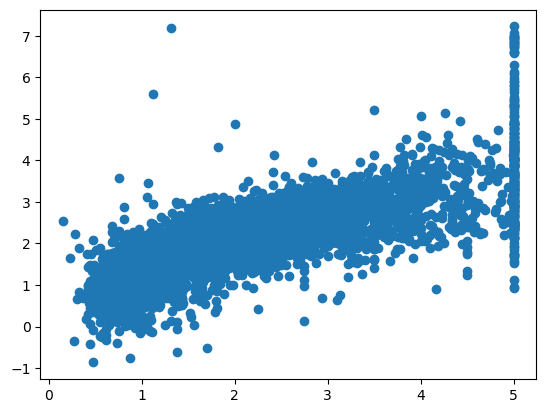

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.show()


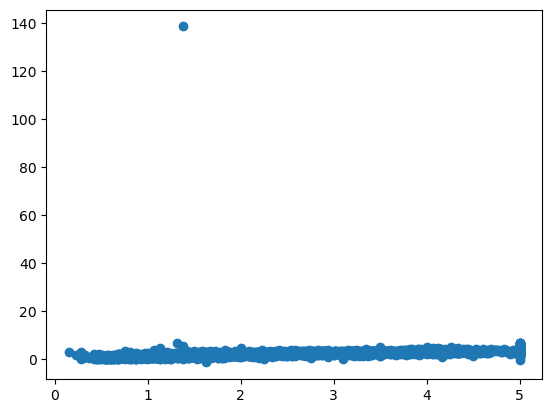

In [79]:
plt.scatter(y2_test,y2_predict)
plt.show()


In [1]:
## Gradient Descent Algortihm

In [4]:
import numpy as np

In [34]:
def step_gradient(points,learning_rate,m,c):
    m_slope = 0
    c_slope = 0
    M = len(points)
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        m_slope += (-2/M)*(y - m*x - c)*x
        c_slope += (-2/M)*(y - m*x - c)*(-1)
    new_m = m - learning_rate * m_slope
    new_c = m - learning_rate * c_slope
    return new_m,new_c
     

In [43]:
def gd(points,learning_rate,num_iterations):
    m = 0
    c = 0
    for i in range(num_iterations):
        m,c = step_gradient(points,learning_rate,m,c)
        print("cost",i , cost(points,m,c))
    return m,c    

In [44]:
def cost(points,m,c):
    M = len(points)
    total_cost = 0
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost += (1/M) * ((y - m*x - c) ** 2)
    return total_cost    

In [45]:
def run():
    data = np.loadtxt("Dataset/data.csv",delimiter= ",")
    learning_rate = 0.0001
    num_iterations = 100
    m,c = gd(data,learning_rate,num_iterations)
    print(m, ",", c)

In [46]:
run()

cost 0 1486.719109014127
cost 1 431.6187465678579
cost 2 186.02761219783406
cost 3 129.0899288451046
cost 4 115.88053027669719
cost 5 112.81047047212469
cost 6 112.09428265531022
cost 7 111.925933346829
cost 8 111.88575096290305
cost 9 111.87587095357638
cost 10 111.87330666448103
cost 11 111.87257992259022
cost 12 111.87234767604137
cost 13 111.87226312029546
cost 14 111.87222873037676
cost 15 111.87221363987156
cost 16 111.8722067155996
cost 17 111.87220346157098
cost 18 111.87220191369275
cost 19 111.87220117297082
cost 20 111.87220081746825
cost 21 111.87220064660657
cost 22 111.87220056443088
cost 23 111.8722005248957
cost 24 111.872200505872
cost 25 111.87220049671753
cost 26 111.87220049231195
cost 27 111.8722004901918
cost 28 111.87220048917148
cost 29 111.8722004886804
cost 30 111.87220048844414
cost 31 111.87220048833036
cost 32 111.87220048827567
cost 33 111.87220048824933
cost 34 111.87220048823667
cost 35 111.87220048823056
cost 36 111.87220048822763
cost 37 111.8722004882